**Филатова Анастасия Евгеньвена, ИУ5-65Б, РК1\
Вариант 19: задача 3, набор данных 3**

**Задание**\
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

**Дополнительное задание**\
Для набора данных построить "парные диаграммы".

**Решение**

Импорт библиотек и загрузка данных

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 
sns.set(style="ticks")

In [10]:
uploaded=files.upload()



Saving marvel-wikia-data.csv to marvel-wikia-data.csv


In [15]:
data = pd.read_csv('marvel-wikia-data.csv', sep=",")

Основные характеристики датасета

In [16]:
# первые 5 строк датасета
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [17]:
# размер датасета
data.shape

(16376, 13)

In [18]:
# типы колонок
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [19]:
# проверка на наличие пустых значений
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

page_id - 0
name - 0
urlslug - 0
ID - 3770
ALIGN - 2812
EYE - 9767
HAIR - 4264
SEX - 854
GSM - 16286
ALIVE - 3
APPEARANCES - 1096
FIRST APPEARANCE - 815
Year - 815


In [20]:
# поиск колонок, в которых нет пустых значений
data.columns[data.notna().all()]

Index(['page_id', 'name', 'urlslug'], dtype='object')

Подбор колонок для преобразования категариальных признаков в количественные

In [21]:
# поиск категориальных признаков, в которых мало уникальных значений
unique_objects = data.select_dtypes(include=['object']).nunique().sort_values().head(5)
print(unique_objects)

ALIVE    2
ALIGN    3
ID       4
SEX      4
GSM      6
dtype: int64


In [22]:
# Вывод категориальных признаков с указанием уникальных значений
category_cols = unique_objects.index.tolist()
for col in data[category_cols]:
  print(col, '-', data[col].unique(), ', кол-во пустых значений: ', data[col].isnull().sum())

ALIVE - ['Living Characters' 'Deceased Characters' nan] , кол-во пустых значений:  3
ALIGN - ['Good Characters' 'Neutral Characters' 'Bad Characters' nan] , кол-во пустых значений:  2812
ID - ['Secret Identity' 'Public Identity' 'No Dual Identity'
 'Known to Authorities Identity' nan] , кол-во пустых значений:  3770
SEX - ['Male Characters' 'Female Characters' 'Genderfluid Characters'
 'Agender Characters' nan] , кол-во пустых значений:  854
GSM - [nan 'Bisexual Characters' 'Transvestites' 'Homosexual Characters'
 'Pansexual Characters' 'Transgender Characters' 'Genderfluid Characters'] , кол-во пустых значений:  16286


In [23]:
# проверка на связь строк, в которых есть пустые значения, чтобы удалить их из датасета
data[data[category_cols[0]].isnull()][category_cols]

,ALIVE,ALIGN,ID,SEX,GSM
16293,NaN,NaN,NaN,NaN,NaN
16329,NaN,NaN,NaN,NaN,NaN
16347,NaN,NaN,NaN,NaN,NaN


In [24]:
# удаляем строки, т.к. значения не определены во всех колонках
data = data[data[category_cols[0]].notna()]
# проверяем
data[data[category_cols[0]].isnull()][category_cols]

,ALIVE,ALIGN,ID,SEX,GSM


Преобразование категориальных признаков методами: label encoding и one hot encoding

In [25]:
# импорт
from sklearn.preprocessing import LabelEncoder

In [27]:
# label encdoing для колонки APPEARANCES
le = LabelEncoder()
face_le = le.fit_transform(data['APPEARANCES'])
print('APPEARANCES, label encoded -', face_le)
print('APPEARANCES, unique values -', np.unique(face_le))
print('APPEARANCES, source values -', le.inverse_transform(face_le))

APPEARANCES, label encoded - [ 357  356  355 ...  729  903 1450]
APPEARANCES, unique values - [   0    1    2 ... 1448 1449 1450]
APPEARANCES, source values - [4043. 3360. 3061. ...   nan   nan   nan]


In [30]:
# one hot encdoging для колонки ALIVE
pd.get_dummies(data['ALIVE'], dummy_na=True, prefix='ALIVE').head(n=15)

,ALIVE_Deceased Characters,ALIVE_Living Characters,ALIVE_nan
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


Поиск колонки для масштабирования данных

In [31]:
# выборка 20 количественных признаков с количеством уникальных значений меньше 1000
quantity_cols = data.select_dtypes(exclude=['object']).nunique().where(lambda x:x < 1000).sort_values(ascending=False).head(20)
print(quantity_cols)

APPEARANCES    358.0
Year            75.0
page_id          NaN
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b1c4d9890>,
      dtype=object)

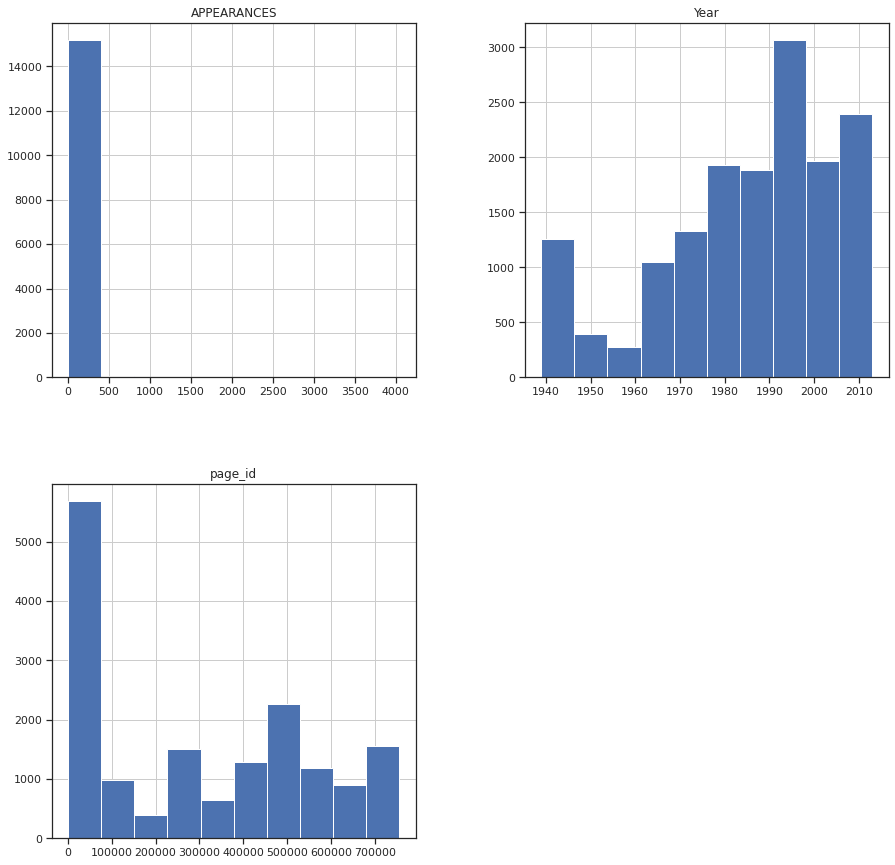

In [32]:
# гистограммы для этих признаков
data[quantity_cols.index.tolist()].hist(figsize=(15, 15))

Масштабирование данных на основе Z-оценки и MinMax

In [33]:
# импорт
from sklearn.preprocessing import MinMaxScaler, StandardScaler

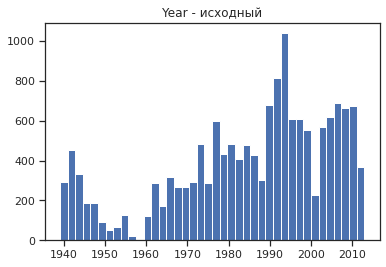

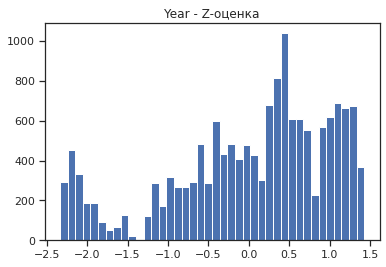

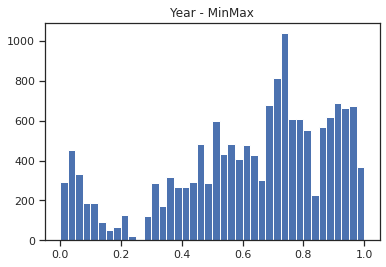

In [40]:
# масштабируем для BallControl

# Z-оценка
st_s = StandardScaler()
st_s_year = st_s.fit_transform(data[['Year']])

# MinMax
mm_s = MinMaxScaler()
mm_s_year = mm_s.fit_transform(data[['Year']])

# построение гистограмм
plt.hist(data['Year'], 40)
plt.title('Year - исходный')
plt.show()

plt.hist(st_s_ball_control, 40)
plt.title('Year - Z-оценка')
plt.show()

plt.hist(mm_s_ball_control, 40)
plt.title('Year - MinMax')
plt.show()

Дополнительное задание: построение "парных диаграмм"

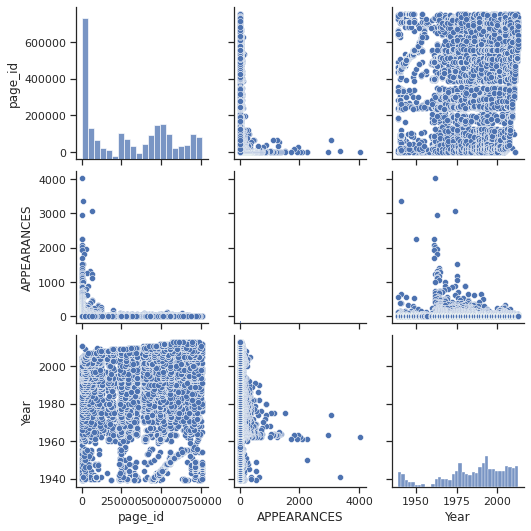

In [41]:
sns.pairplot(data)

**Вывод**\
Масштабирование данных и преобразование категориальных признаков в количественные были проведены с учетом характеристик датасета. Для масштабирования были использованы методы *MinMax* и *на основе Z-оценки*. Для преобразования категориальных признаков в количественные были использованы методы *label encoding* и one *hot encoding*. Были подобраны признаки, которые наглядно продемонстрировали работу этих методов. Для реализации и визуализации были использованы функции из библиотек: *pandas*, *sklearn*, *seaborn*, *matplotlib*.